# Proyecto: regresión lineal
## 1. Configuración inicial
1.1 Importar la bibliotecas que se usarán

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from IPython.display import HTML, display

1.2 Configurar opciones de las bibliotecas y funciones comunes

In [32]:
#Eliminar notacion exponencial
np.set_printoptions(suppress=True)

#Imprime una tabla HTML a partir de una estructura de datos
def imprimirTabla (data):
    display(HTML(
       '<center><table><tr>{}</tr></table></center>'.format(
           '</tr><tr>'.join(
               '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
           )
    ))

## 2. Análisis exploratorio de datos
2.1 Cargar nuestros datos de entrada, los cuales tienen la siguiente estructura.


| Posición | Nombre | Descripción |
| --- | --- | --- |
| 1 | SalesPrice | Precio de venta |
| 2 | OverallQual | Calidad de materiales y acabados |
| 3 | 1stFlrSF | Área total del primer nivel en pies cuadrados|
| 4 | TotRmsAbvGrd:  | Total de habitaciones sin incluir baños |
| 5 | YearBuilt:  | Año de construcción de la casa|
| 6 | LotFrontage:  | Pies lineales de calle conectados a propiedad. |

In [33]:
#Cargar el conjunto de datos
data=np.load('proyecto_training_data.npy')

#Obtener el total de registros
totalLen=len(data)

2.2. Escoger los datos de entrenamiento y de prueba. En este caso se usará el primer 80% de datos para entrenamiento y el 20% restante será utilizado como datos de prueba. Además se eliminan los datos no numéricos para evitar problemas con las operaciones que se realicen con numpy.

In [34]:
#Calcular el largo de los registros de entrenamiento y de prueba
trainingLen=int(totalLen*0.8)
testLen=int(totalLen*0.2)

#Obtener los datos de entrenamiento
trainingData=data[0:trainingLen]

#Eliminar los valores con valores no numéricos para funciones que no manejan nan
trainingData_zero=np.nan_to_num(trainingData)
testData=data[trainingLen:]

2.3 Cálculo del promedio, máximo, mínimo, desviación y rango (peak to peak). Para colapsar los valores sobre las columnas utilizamos la opción axis en el valor cero.

In [35]:
#Calcular el promedio
trainingAvg = np.round(np.nanmean(trainingData, axis=0),2).tolist()
trainingAvg =["<b>Promedio</b>"] + trainingAvg 

#Calcular máximo
trainingMax = np.nanmax(trainingData,axis=0).tolist()
trainingMax=["<b>Máximo</b>"] + trainingMax

#Calcular mínimo
trainingMin = np.nanmin(trainingData,axis=0).tolist()
trainingMin=["<b>Mínimo</b>"] +trainingMin

#Calcular desviación estándar
trainingStd = np.round(np.nanstd(trainingData, axis=0),2).tolist()
trainingStd=["<b>Desviación estándar</b>"] +trainingStd

#Calcular rango

trainingRange = (np.nanmax(trainingData,axis=0)-np.nanmin(trainingData,axis=0)).tolist()
trainingRange=["<b>Rango</b>"] +trainingRange

#Dar formato a los datos para imprimirlos de mejor manera
datos=[]
datos.append(['','<b>Precio de venta','<b>Calidad</b>','<b>Área</b>','<b>Habitaciones</b>','<b>Año de construcción</b>','<b>Espacio en calle</b>'])
datos.append(trainingAvg)
datos.append(trainingMax)
datos.append(trainingMin)
datos.append(trainingStd)
datos.append(trainingRange)

imprimirTabla(datos)

,Precio de venta,Calidad,Área,Habitaciones,Año de construcción,Espacio en calle
Promedio,180590.28,6.1,1156.32,6.49,1971.45,69.95
Máximo,755000.0,10.0,3228.0,14.0,2010.0,313.0
Mínimo,34900.0,1.0,334.0,2.0,1875.0,21.0
Desviación estándar,78781.95,1.38,373.62,1.61,29.94,23.47
Rango,720100.0,9.0,2894.0,12.0,135.0,292.0


## 3. Histogramas
3.1 Se dibuja la distrución de valores para cada una de las columnas dentro de nuestro conjunto de datos. Además se calcula el coeficiente de correlación en función de la variable.

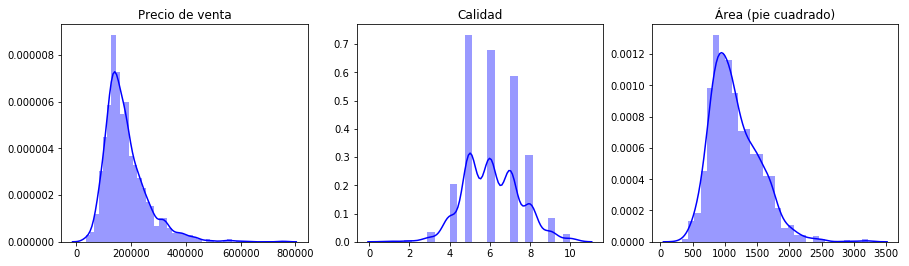

<Figure size 432x288 with 0 Axes>

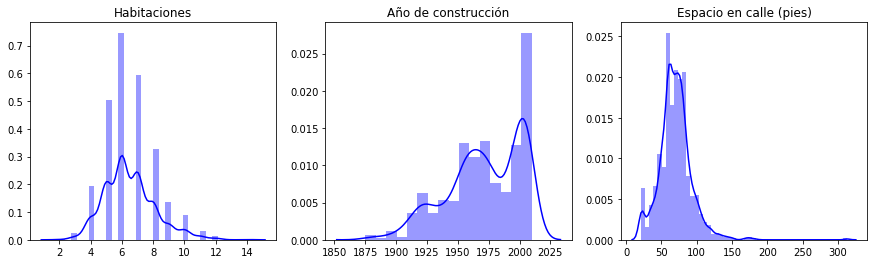

In [36]:
#Definir conjunto de gráficas
f, axes = plt.subplots(1, 3)
f.set_size_inches(15, 4)

#Dibujar la gráfica de distribución para el valor total
plot=sns.distplot(a=trainingData[:,0], ax=axes[0],color="b").set_title('Precio de venta')

#Proceder de manera análoga con el resto de variables independientes
#Calidad
sns.distplot(a=trainingData[:,1], ax=axes[1],color="b").set_title('Calidad')

#Área
sns.distplot(a=trainingData[:,2], ax=axes[2],color="b").set_title('Área (pie cuadrado)')

#Crear una segunda fila de gráficas
fig=plt.figure()
f2, axes2 = plt.subplots(1, 3)
f2.set_size_inches(15, 4)

#Habitaciones
sns.distplot(a=trainingData[:,3], ax=axes2[0],color="b").set_title('Habitaciones')

#Año de construcción
sns.distplot(a=trainingData[:,4], ax=axes2[1],color="b").set_title('Año de construcción')

#Espacio en la calle
s=sns.distplot(a=trainingData[:,5][~np.isnan(trainingData[:,5])], ax=axes2[2],color="b").set_title('Espacio en calle (pies)')

## 4. Gráficos de dispersión
4.1 Nos proporcionan una idea de la relación de nuestras variables independientes y la variable dependiente.

Text(0.5, 1.0, 'Espacio en calle (R=0.3633)')

<Figure size 432x288 with 0 Axes>

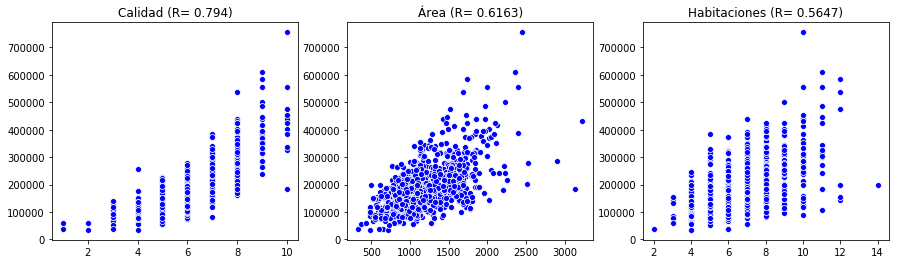

<Figure size 432x288 with 0 Axes>

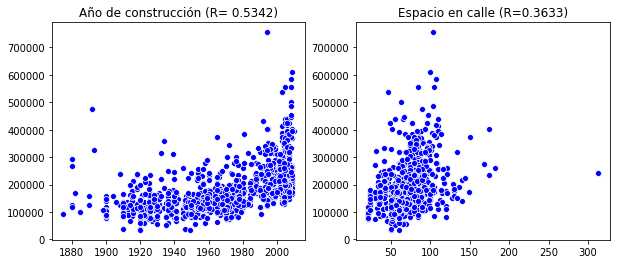

In [37]:
graph2 = plt.figure()
f, axes = plt.subplots(1, 3)
f.set_size_inches(15, 4)


tCorr=" (R= "+str(round(np.corrcoef(trainingData[:,1],trainingData[:,0])[0, 1],4))+")"
sns.scatterplot(x=trainingData[:,1], y=trainingData[:,0], ax=axes[0],color="b").set_title('Calidad'+tCorr)


#Area
#Calcular el coeficiente de correlación
tCorr=" (R= "+str(round(np.corrcoef(trainingData[:,2],trainingData[:,0])[0, 1],4))+")"
sns.scatterplot(x=trainingData[:,2], y=trainingData[:,0], ax=axes[1],color="b").set_title('Área'+tCorr)

#Habitaciones
tCorr=" (R= "+str(round(np.corrcoef(trainingData[:,3],trainingData[:,0])[0, 1],4))+")"
sns.scatterplot(x=trainingData[:,3], y=trainingData[:,0], ax=axes[2],color="b").set_title('Habitaciones'+tCorr)

graph2 = plt.figure()
f, axes = plt.subplots(1, 2)
f.set_size_inches(10, 4)

#Año
tCorr=" (R= "+str(round(np.corrcoef(trainingData[:,4],trainingData[:,0])[0, 1],4))+")"
sns.scatterplot(x=trainingData[:,4], y=trainingData[:,0], ax=axes[0],color="b").set_title('Año de construcción'+tCorr)

#Espacio en la calle
tCorr=" (R="+str(round(np.corrcoef(trainingData[:,5][~np.isnan(trainingData[:,5])],trainingData[:,0][~np.isnan(trainingData[:,5])])[0, 1],4))+")"
sns.scatterplot(x=trainingData[:,5][~np.isnan(trainingData[:,5])], y=trainingData[:,0][~np.isnan(trainingData[:,5])], ax=axes[1],color="b").set_title('Espacio en calle'+tCorr)

En base a las gráficas y a los coeficientes podemos tomar la variable Calidad y  Área como nuestras variables a analizar.
## 5. Entrenamiento
5.1 Esta función se toma la variable x y calcula una y estimada utilizando la operación producto punto. Posee los siguientes parámetros:
  * **y**: vector con los valores observados de la variable dependiente
  * **x**: vector con los valores observados de la variable independientes, para realizar la aproximación
  * **totalIterations**: número de iteraciones que realizará la función para la aproximación
  * **learningRate**: valor que nos indica en cuánto cambian nuestros parámetros cada iteración.
  * **p**: vector con los parámetros de la recta m y b iniciales

In [38]:
#Definición de nuestra función de aprendizaje

def regression_Learning(y,x,totalIterations,learningRate,printRate, p):
    #Inicializar nuestro nuestras estructuras de errores, iteraciones y parámetros
    vectorErrores=[]
    vectorIteraciones=np.arange(totalIterations+1)
    vectorParametros=[]
    vistaTabla=[]
    vistaTabla.append(["<b>Iteración</b>","<b>m</b>","<b>b</b>","<b>Error</b>"])
    
    #Agregar columna con valores 1 para permitir operar vectorizadamente
    x=np.column_stack((x,np.full_like(x,1)))
    
    #Inicializar nuestra variable que cuenta el número de iteracionese
    currentIteration=0;
    
    while True:
        #Calcular la y estimada
        y_=x.dot(p)

        #Calcular el error restando los valores de la y real menos la y calculada
        #Posteriormente elevar al cuadrado, sacar la media y dividir dentro de dos
        e=np.power(y-y_,2)
        e=np.mean(e)/2.0

        #Imprimir el error a las 1000 iteraciones
        if(currentIteration%printRate==0 or currentIteration==0):
            vistaTabla.append([currentIteration]+p.flatten().tolist()+[round(e,2)]);
        
        #Agregar el error
        vectorErrores.append(e)
        
        #Agregar los parametros actuales
        vectorParametros.append(p.flatten().tolist())
        
        #Calcular la gradiente
        p_=np.transpose(y_-y)
        p_=np.dot(p_,x)
        p_=np.mean(p_,axis=0)
        p=np.subtract(p,(p_*learningRate).reshape((-1,1)))

        #Contador que se encarga de determinar si es el fin de las iteraciones
        currentIteration+=1
        if currentIteration>totalIterations:
            break

    imprimirTabla(vistaTabla)
    return vectorIteraciones,vectorErrores,vectorParametros


def graficarError(iteracion,error,titulo="nuevo"):
    plt.figure()
    plt.title(titulo)
    plt.plot(iteracion,error)
    plt.show()


def graficarParametros (x,parametros,n,titulo):
    x_=np.column_stack((x,np.full_like(x,1)))
    plt.figure()
    plt.title(titulo)
    parametrosFiltrados=parametros[::n]
    plt.scatter(x, y)
   
    for i in range(0, len(parametrosFiltrados)):
        y_=x_.dot(parametrosFiltrados[i])
        plt.plot(x,y_)
    
    plt.show()

5.2 Entrenamiento usando la variable Calidad


Iteración,m,b,Error
0,0,0,19409722053.22
450,39756.428268584896,-60249.873728096245,1178730139.1
900,43385.76777192738,-83493.07775482713,1150999810.58
1350,44686.05749931988,-91820.46057470747,1147440383.62
1800,45151.91454399851,-94803.92638901976,1146983500.45
2250,45318.81795137366,-95872.81783519176,1146924855.55
2700,45378.61472317656,-96255.77141830936,1146917327.98
3150,45400.03821580791,-96392.97285943576,1146916361.75
3600,45407.71364748575,-96442.12825653105,1146916237.72
4050,45410.46353763922,-96459.73924548099,1146916221.8


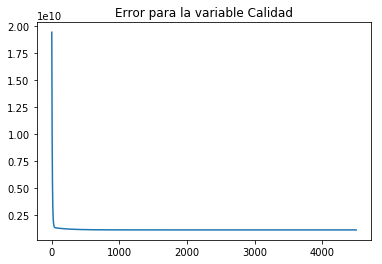

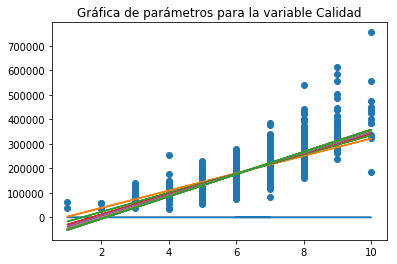

In [39]:
#Vector con la y real
y=trainingData[:,0].reshape((-1,1))

#Definir conjuntos de variables independientes
x1=trainingData[:,1]

#Ejecutar la regresion para la el Overal Rating
display(HTML("<b>Cálculo de parámetros para la variable Calidad</b>"))
i1, e1,p1=regression_Learning(y,x1,totalIterations=4500,learningRate=0.0000412,printRate=450,p=np.array([[0],[0]]))

graficarError(i1, e1,"Error para la variable Calidad")

graficarParametros (x1,p1,200,"Gráfica de parámetros para la variable Calidad")


5.3 Entrenamiento usando la variable de Área

Iteración,m,b,Error
0,0,25000,15207465118.29
50000,134.09402818009644,25034.064442696796,1925951809.09
100000,134.0676055818978,25067.807268704255,1925934987.45
150000,134.041351506455,25101.33488370235,1925918379.7
200000,134.0152648789325,25134.648660302777,1925901983.12
250000,133.9893446313531,25167.749962360875,1925885795.03
300000,133.96358970254798,25200.640145035555,1925869812.78
350000,133.9379990381186,25233.320554841008,1925854033.75
400000,133.912571590389,25265.792529704857,1925838455.35
450000,133.88730631836737,25298.05739902042,1925823075.03


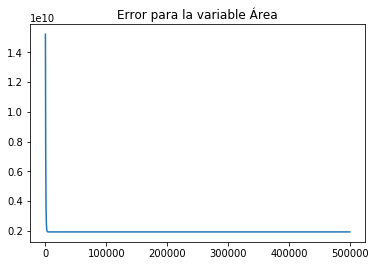

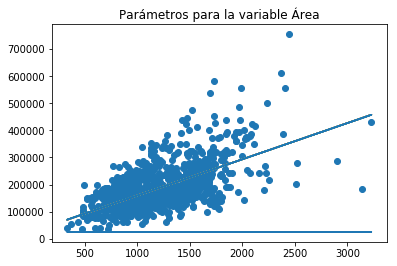

In [40]:
#Definir conjuntos de variables independientes
x2=trainingData[:,2]

#Realizar las iteraciones
display(HTML("<b>Cálculo de parámetros para el  Área</b>"))

i2,e2,p2=regression_Learning(y,x2,totalIterations=500000,learningRate=0.000000001159,printRate=50000,p=np.array([[0],[25000]]))

#Realizar la gráfica de los errores
graficarError(i2, e2,"Error para la variable Área")

#Graficar el cambio de los parámetros
graficarParametros (x2,p2,50000, "Parámetros para la variable Área")


## 6. Regresión con SciKit Learn 
6.1 SciKit Learn nos provee herramientas para facilitar estudios sobre datos. En este caso se utiliza la función LinearRegression para comparar nuestros resultados con los de dicha herramienta.

In [41]:
#Inicializar la clase que hace 
modelo = LinearRegression()

#Realizar la regrsión usando el método fit 
modelo.fit(x1.reshape(-1, 1), y)

#Obtener el coeficiente m
pSci1=np.array([modelo.coef_[0][0],modelo.intercept_[0]])

#Obtener los coeficientes de la última iteración manual
pManual1=np.array(p1[-1])


#Estructura pra mostrar en html los valores
vistaParametros=[
    ['<b>OveralQuality</b>','m','b'],
    ['Modelo manual']+p1[-1],
    ['Modelo de SciKit']+[modelo.coef_[0][0],modelo.intercept_[0]]
    
]

imprimirTabla(vistaParametros)


#Analogamente, realizar los pasos para la siguiente variable
modelo2 = LinearRegression()
modelo2.fit(x2.reshape(-1, 1), y)
pSci2=np.array([modelo2.coef_[0][0],modelo2.intercept_[0]])
pManual2=np.array(p2[-1])


vistaParametros=[
    ['<b>Área</b>','m','b'],
    ['Modelo manual']+p2[-1],
    ['Modelo de SciKit']+[modelo2.coef_[0][0],modelo2.intercept_[0]]
    
]

imprimirTabla(vistaParametros)


OveralQuality,m,b
Modelo manual,45411.448745530266,-96466.04876488516
Modelo de SciKit,45411.998779159156,-96469.57131873982


Área,m,b
Modelo manual,133.86220218770026,25330.116483702215
Modelo de SciKit,129.95124228715716,30324.585174963664


## 6. Comparación de modelos
6.1 Definir función que promedie las predicciones

In [42]:
def averagePrediction (pManual, pSci,x):
    x_=np.column_stack((x,np.full_like(x,1)))
    y_Sci=x_.dot(pSci)
    y_Manual=x_.dot(pManual)
    y_Average=(y_Sci+y_Manual)/2
    return y_Manual, y_Sci, y_Average

y_Manual1,y_Sci1,y_Average1=averagePrediction(pManual1,pSci1,x1)

y_Manual2,y_Sci2,y_Average2=averagePrediction(pManual2,pSci2,x2)


#Imprimir las predicciones
#Calidad
print (y_Manual1)
print(y_Sci1)
print(y_Average1)

#Area
print (y_Manual2)
print(y_Sci2)
print(y_Average2)


[221414.09245383 176002.6437083  221414.09245383 ... 221414.09245383
 266825.54119936 176002.6437083 ]
[221414.42013537 176002.42135622 221414.42013537 ... 221414.42013537
 266826.41891453 176002.42135622]
[221414.2562946  176002.53253226 221414.2562946  ... 221414.2562946
 266825.98005695 176002.53253226]
[139916.16155637 194264.21564458 148483.34249639 ... 226391.14416963
 252092.68698967 153703.96838171]
[141562.84857277 194323.05294136 149879.72807915 ... 225511.35109027
 250461.98960941 154947.82652835]
[140739.50506457 194293.63429297 149181.53528777 ... 225951.24762995
 251277.33829954 154325.89745503]


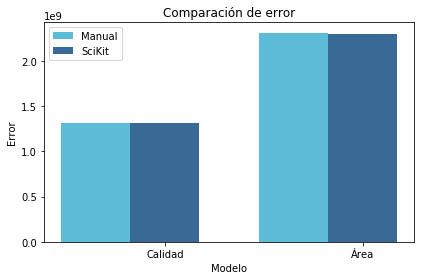

In [43]:
yt=testData[:,0]
x1t=testData[:,1]
x2t=testData[:,2]


def generateErrorTest (xt,yt,mParameters,sParameters):
    xt=np.column_stack((xt,np.full_like(xt,1))) 
    mParameters=np.array(mParameters)
    sParameters=np.array(sParameters)
    #Calcular la y estimada con el modelo manual
    yt_=xt.dot(mParameters)

    #Calcular el error usando el modelomanual
    em=np.power(yt-yt_,2.0)
    em=np.mean(em)/2.0
    
    #Analogamente, calcular el error con el modelo de SciKit Learn
    yt_=xt.dot(sParameters)
    #print(yt_)
    es=np.power(yt-yt_,2.0)
    es=np.mean(es)/2.0
    
    #Devolver los errores
    return round(em,2), round(es,2)
    
errorManual1,errorSci1=generateErrorTest (x1t,yt,mParameters=pManual1,sParameters=pSci1)
errorManual2,errorSci2=generateErrorTest (x2t,yt,mParameters=pManual2,sParameters=pSci2)

bar1=[errorManual1,errorManual2]
bar2=[errorSci1, errorSci2]

# data to plot
n_groups = 2

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, bar1, bar_width,
alpha=opacity,
color='#35ACCE',
label='Manual')
 
rects2 = plt.bar(index + bar_width, bar2, bar_width,
alpha=opacity,
color='#07447B',
label='SciKit')
 
plt.xlabel('Modelo')
plt.ylabel('Error')
plt.title('Comparación de error')
plt.xticks(index + bar_width, ('Calidad', 'Área'))
plt.legend()
 
plt.tight_layout()
plt.show()




## 7.  Conclusión
El modelo que mejor representa es el que utiliza el la variable Calidad (OveralQuality) ya que tiene el mejor valor de correlación (0.794) y el menor valor de error.